<a href="https://colab.research.google.com/github/sandhu1503/Smart-Crop-Yield-Prediction-Using-ML-DL/blob/main/Agriculture_Crop_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###About Dataset
This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

Region: The geographical region where the crop is grown (North, East, South, West).

Soil_Type: The type of soil in which the crop is planted (Clay, Sandy, Loam, Silt, Peaty, Chalky).

Crop: The type of crop grown (Wheat, Rice, Maize, Barley, Soybean, Cotton).
Rainfall_mm: The amount of rainfall received in millimeters during the crop growth period.

Temperature_Celsius: The average temperature during the crop growth period, measured in degrees Celsius.

Fertilizer_Used: Indicates whether fertilizer was applied (True = Yes, False = No).

Irrigation_Used: Indicates whether irrigation was used during the crop growth period (True = Yes, False = No).

Weather_Condition: The predominant weather condition during the growing season (Sunny, Rainy, Cloudy).

Days_to_Harvest: The number of days taken for the crop to be harvested after planting.

Yield_tons_per_hectare: The total crop yield produced, measured in tons per hectare.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('/content/crop_yield.csv')

In [ ]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
df.dtypes

,0
Region,object
Soil_Type,object
Crop,object
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Weather_Condition,object
Days_to_Harvest,int64
Yield_tons_per_hectare,float64


In [ ]:
df.shape

(1000000, 10)

In [ ]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


In [ ]:
df['Crop'].value_counts()

,count
Crop,
Maize,166824
Rice,166792
Barley,166777
Wheat,166673
Cotton,166585
Soybean,166349


###Feature Understanding

Histogram

Pie

Scatter

Boxplot

KDE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

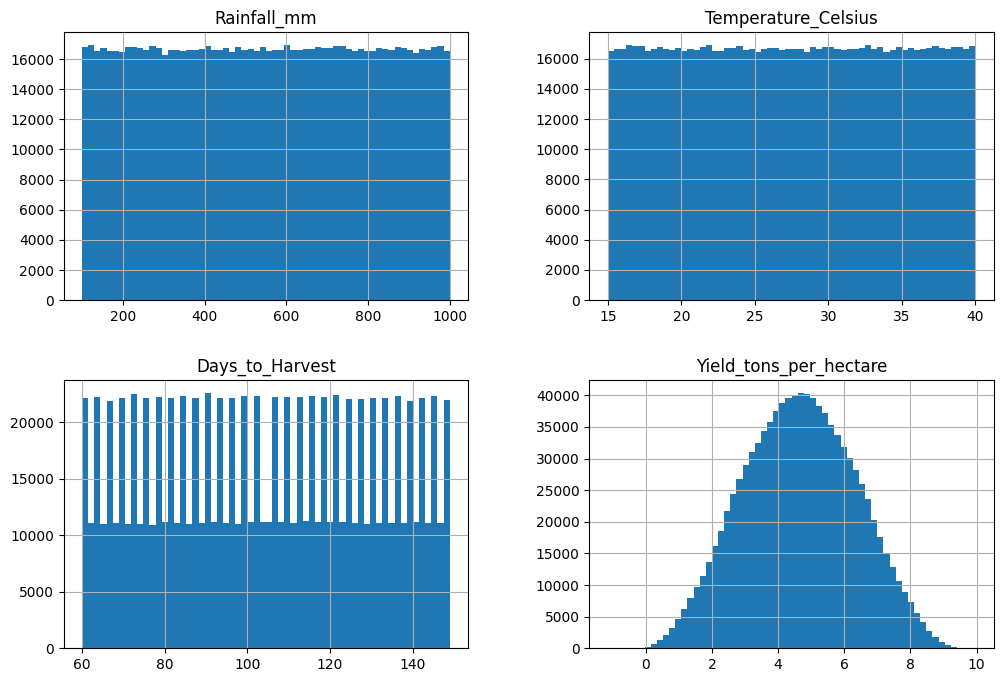

In [ ]:
df.hist(bins=60, figsize =(12,8))
plt.show()

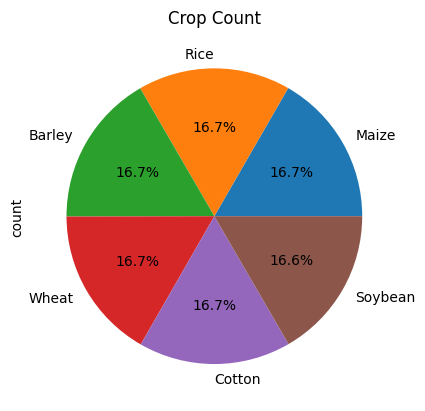

In [ ]:
ax = df['Crop'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Crop Count')

plt.show()

In [ ]:
df.corr(numeric_only=True)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000159,-0.001136,-0.000628,-0.002668,0.764605
Temperature_Celsius,-0.000159,1.000000,0.002320,-0.000507,-0.000728,0.085511
Fertilizer_Used,-0.001136,0.002320,1.000000,0.001473,-0.001027,0.442071
Irrigation_Used,-0.000628,-0.000507,0.001473,1.000000,-0.001233,0.353696
Days_to_Harvest,-0.002668,-0.000728,-0.001027,-0.001233,1.000000,-0.002586
Yield_tons_per_hectare,0.764605,0.085511,0.442071,0.353696,-0.002586,1.000000


<Axes: >

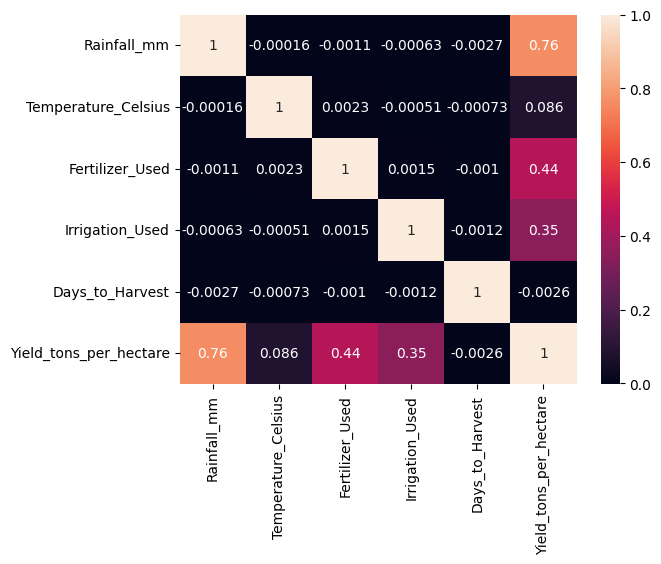

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

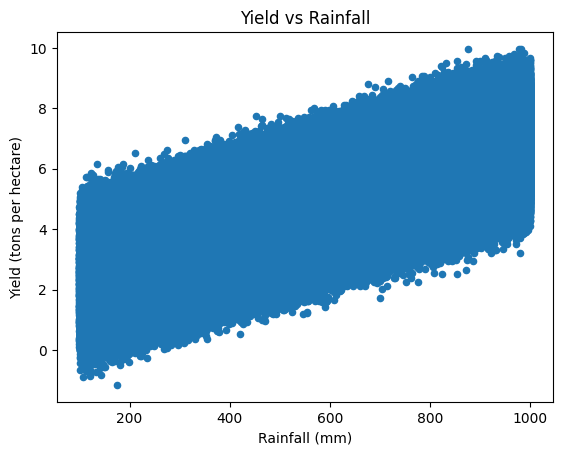

In [ ]:
bx = df.plot.scatter(x='Rainfall_mm', y='Yield_tons_per_hectare', title='Yield vs Rainfall')
bx.set_xlabel('Rainfall (mm)')
bx.set_ylabel('Yield (tons per hectare)')

plt.show()

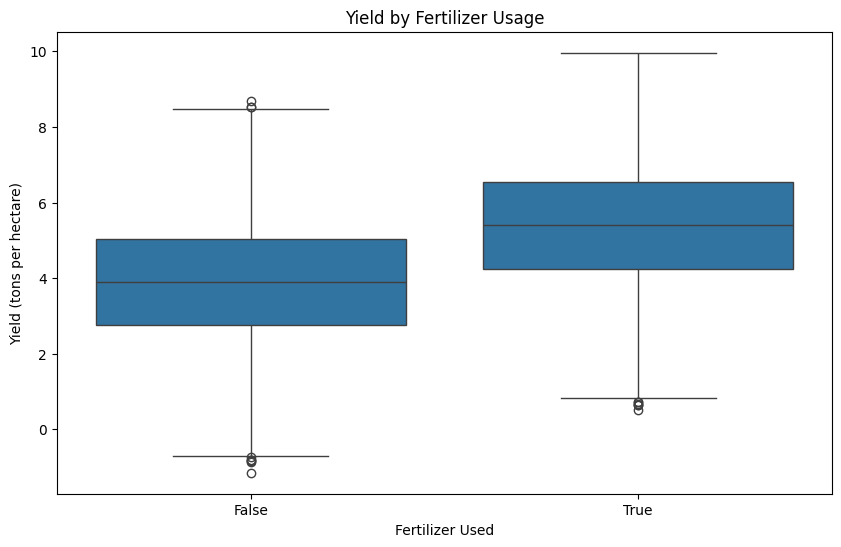

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Fertilizer Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [ ]:
# Group data by 'Fertilizer_Used'
groups = df.groupby('Fertilizer_Used')

outliers_count = {}

for Fertilizer, group in groups:
    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[Fertilizer] = outliers.shape[0]


for Fertilizer, count in outliers_count.items():
    print(f"Outliers in Fertilizer_Used = {Fertilizer}: {count} ")

Outliers in Fertilizer_Used = False: 9 
Outliers in Fertilizer_Used = True: 6 


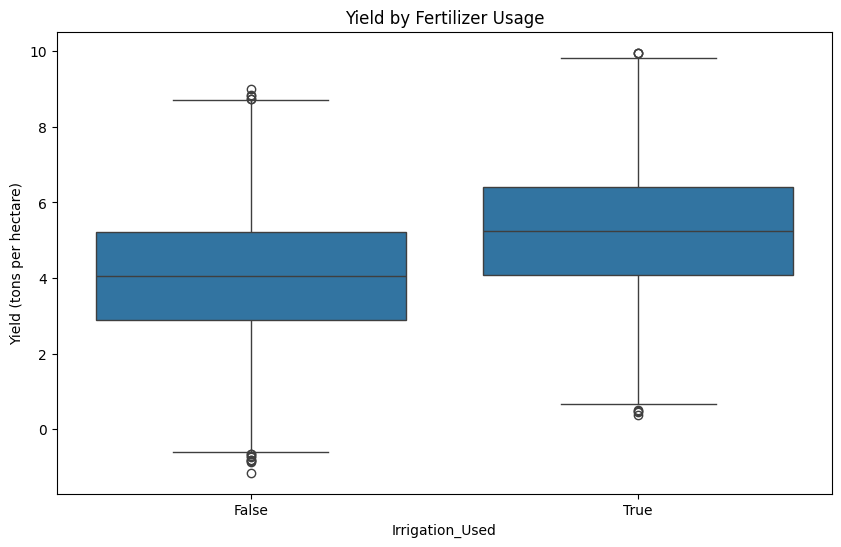

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Irrigation_Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [ ]:
# Group data by 'Irrigation_Used'
groups = df.groupby('Irrigation_Used')

outliers_count = {}


for irrigation, group in groups:

    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[irrigation] = outliers.shape[0]

for irrigation, count in outliers_count.items():
    print(f"Outliers in Irrigation_Used = {irrigation}: {count} ")

Outliers in Irrigation_Used = False: 14 
Outliers in Irrigation_Used = True: 7 


 Z-score > 3 or Z-score < -3 indicates that the data point is far from the mean and likely an outlier.

In [ ]:
# List of numerical columns
num_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]

# Set Z-score threshold
threshold = 3

# Find and count outliers using Z-score
outliers = {}

for col in num_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = np.abs((df[col] - mean) / std)
        # Find rows where |Z| > 3 (outliers)
        outliers[col] = df[z_scores > threshold]



In [ ]:
# Print number of outliers for each column
for col, outlier_data in outliers.items():
    print(f"\nOutliers in {col}: {outlier_data.shape[0]} ")


Outliers in Rainfall_mm: 0 

Outliers in Temperature_Celsius: 0 

Outliers in Days_to_Harvest: 0 

Outliers in Yield_tons_per_hectare: 37 


In [ ]:
df = df[z_scores <= threshold]

In [ ]:
df.shape

(999963, 10)

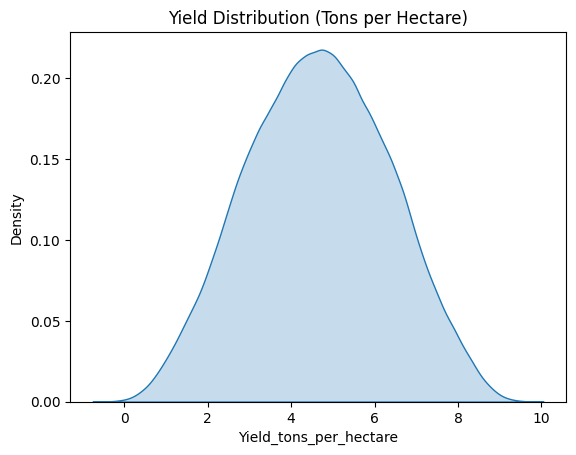

In [ ]:
sns.kdeplot(df['Yield_tons_per_hectare'], fill=True)
plt.title('Yield Distribution (Tons per Hectare)')
plt.show()

In [ ]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


###Data Preprocessing

In [ ]:
X = df.drop('Yield_tons_per_hectare',axis=1)
y = df.loc[:,'Yield_tons_per_hectare']

In [ ]:
X.shape,y.shape

((999963, 9), (999963,))

###Encoding the categorical data

In [ ]:
label_map = {'Fertilizer_Used': {False: 0, True: 1}, 'Irrigation_Used': {False: 0, True: 1}}
X.replace(label_map, inplace=True)
X.head()

<ipython-input-31-2685097fcc74>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace(label_map, inplace=True)


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110


In [ ]:
X_ohe= pd.get_dummies(X,columns=['Region','Soil_Type','Crop','Weather_Condition'])

In [ ]:
X_ohe.shape

(999963, 24)

Splitting the dataset into the Training set and Test se

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((799970, 24), (799970,), (199993, 24), (199993,))

###We are planning to apply

Linear Regression

Decision Trees

Random Forest

Gradient Boosting
  
**Neural** Networks



###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,\
mean_squared_error, r2_score

print(mean_absolute_error( y_test, y_pred))
print(mean_squared_error( y_test, y_pred))
print(r2_score(y_test, y_pred))

0.39842675461327026
0.2492066491781397
0.9134076556692401


In [ ]:
from sklearn.linear_model import Ridge
rdge = Ridge(alpha= 0.1 , max_iter = 20, random_state = 7)
rdge.fit(X_train,y_train)
y_pred = rdge.predict(X_test)

In [ ]:
print(mean_absolute_error( y_test, y_pred))
print(mean_squared_error( y_test, y_pred))
print(r2_score(y_test, y_pred))

0.3984267537520903
0.24920664858632385
0.9134076558748796


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree:\n  MSE: {mse_dt:.2f}\n  R2: {r2_dt:.2f}\n")

Decision Tree:
  MSE: 0.53
  R2: 0.82



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest:\n  MSE: {mse_rf:.2f}\n  R2: {r2_rf:.2f}\n")

Random Forest:
  MSE: 0.26
  R2: 0.91



###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting:\n  MSE: {mse_gb:.2f}\n  R2: {r2_gb:.2f}\n")

###Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=42, max_iter=500)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network:\n  MSE: {mse_nn:.2f}\n  R2: {r2_nn:.2f}\n")